> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>**OVERVIEW**: To complete my Data Analysis second project I will using TMDb movies dataset.This data set contains information about 10 thousand movies collected from The Movie Database (TMDb), including user ratings and revenue. It consist of 21 columns and 10866 rows. 

>**My Questions:**:
1.	Which movie had most profit
2.	Which movie had least profit
3.	Which genres of movies had the most realesed?
4.  Which year had the most movies produced?


In [24]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline


UsageError: Line magic function `%` not found.


<a id='wrangling'></a>
## Data Wrangling

> After loading and observing the dataset and suggesting some questions for the analysis.To make our analysis easy and simple we will keeping only relevent columns and rows and we will deleting the irrelevant data.

### General Properties

In [4]:
# Loading our data from csv file and store it in data frame called df:
df=pd.read_csv('tmdb-movies.csv')

# printing out first four lines:
df.head(4)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09


In [5]:
# Performing operation to inspect TMDB data:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [9]:
#looking for instances of missing data:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
df.shape # to know number of rows and columns.

(10866, 21)

> **Observation**:regarding my questions 1- i will consider budget and revenue in dollar because in the data they didn't mention the currency.2- genres column heve multiple variables.

### Data Cleaning (Replace irrelevant data)

1. Removing irrelevant columns :id, imdb_id, homepage, overview, cast, budget_adj, keywords,director, revenue_adj,and runtime

In [7]:
df.drop(['id','imdb_id','homepage','overview','cast','budget_adj','revenue_adj','runtime','keywords','director'],axis=1,inplace=True)
df.head(4)

,popularity,budget,revenue,original_title,tagline,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,The park is open.,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,What a Lovely Day.,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,One Choice Can Destroy You,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Every generation has a story.,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015


2-Removing Duplicated rows:

In [12]:
df.duplicated().sum() #to know number of duplicated rows

1

In [15]:
df.drop_duplicates(inplace=True) #to drop duplicated rows


In [16]:
df.info()# we cant replace or fill the missing values because their type in object 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10865 non-null  float64
 1   budget                10865 non-null  int64  
 2   revenue               10865 non-null  int64  
 3   original_title        10865 non-null  object 
 4   tagline               8041 non-null   object 
 5   genres                10842 non-null  object 
 6   production_companies  9835 non-null   object 
 7   release_date          10865 non-null  object 
 8   vote_count            10865 non-null  int64  
 9   vote_average          10865 non-null  float64
 10  release_year          10865 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 1018.6+ KB


In [39]:
change_type=['budget', 'revenue']
#changing data type
df[change_type]=df[change_type].applymap(np.int64)
#printing the changed information
df.dtypes

popularity              float64
budget                    int64
revenue                   int64
original_title           object
tagline                  object
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis

Now our data ready to explore and visulalize 

### Research Question 1 and 2 (Which movie had the most profit and which had the least profit)

In [74]:
df['Profit'] = df['revenue'] - df['budget'] #Add new column called profit

def find_minmax(x): #use function to calculate most and least profit
    
    min_index = df[x].idxmin()#function 'idmin' to find the least profit movie.
    
    max_index = df[x].idxmax()#function 'idmax' to find the Highest profit movie.
    
    high = pd.DataFrame(df.loc[max_index,:])
    low = pd.DataFrame(df.loc[min_index,:])
    
     #print the movie with most and least movie profit
        
    print("Movie Which Has Highest "+ x + " : ",df['original_title'][max_index])
    print("Movie Which Has Lowest "+ x + "  : ",df['original_title'][min_index])
    return pd.concat([high,low],axis = 1)

#call the find_minmax function.
find_minmax('Profit')

Movie Which Has Highest Profit :  Avatar
Movie Which Has Lowest Profit  :  The Warrior's Way


,1386,2244
popularity,9.43277,0.25054
budget,237000000,425000000
revenue,2781505847,11087569
original_title,Avatar,The Warrior's Way
tagline,Enter the World of Pandora.,Assassin. Hero. Legend.
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
production_companies,Ingenious Film Partners|Twentieth Century Fox ...,Boram Entertainment Inc.
release_date,12/10/09,12/2/10
vote_count,8458,74
vote_average,7.1,6.4


### Research Question 3  (Which genres of movies had the most realesed?)

Text(0.5, 0, 'Genres')

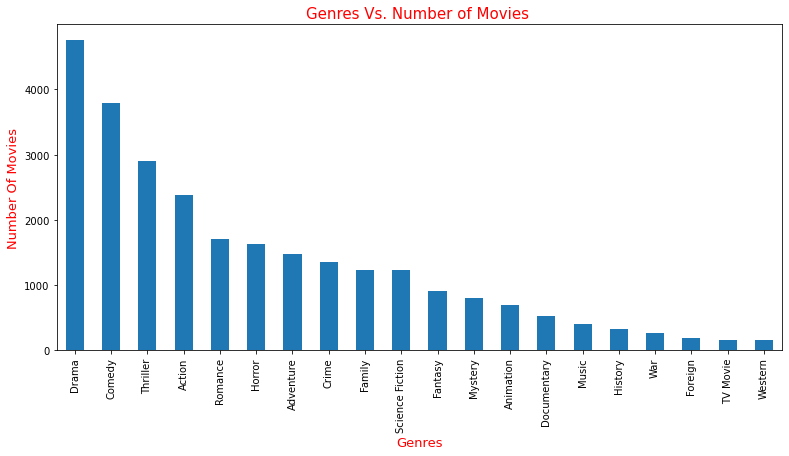

In [93]:
#The function will  split the string and return the count of each genre.
def count_genre(x):
    
    #Tosplit each string
    data_plot = df[x].str.cat(sep = '|')
    data = pd.Series(data_plot.split('|'))
    
    #counts each of the genre and return.
    info = data.value_counts(ascending=False)
    return info

#calling the function for counting genres.
total_genre_movies = count_genre('genres')

#plot a 'barh' plot using plot function for 'genre vs number of movies'.
total_genre_movies.plot(kind= 'bar',figsize = (13,6))

#setup the title and the labels of the plot.
plt.title("Genres Vs. Number of Movies ",fontsize=15,color='red')
plt.ylabel('Number Of Movies',fontsize=13,color='red')
plt.xlabel("Genres",fontsize= 13,color='red')

### Research Question 4 ( Which year had the most movies produced)

Text(0, 0.5, 'Number Of Movies')

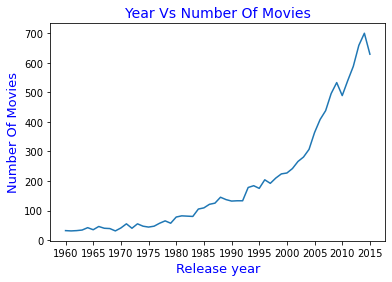

In [95]:
#We use group by to count number of movies  according to their release year.
df.groupby('release_year').count()['original_title'].plot(xticks = np.arange(1960,2016,5))

#set the figure size and labels
plt.title("Year Vs Number Of Movies",fontsize = 14 ,color='blue')
plt.xlabel('Release year',fontsize = 13,color='blue')
plt.ylabel('Number Of Movies',fontsize = 13,color='blue')

<a id='conclusions'></a>
## Conclusions

> **Tip**: In conclusion, regarding first and second questions the result shows us that Avatar has the highest profit wehreas The Warrior's Way has the lowest profit.In addtion to that third qusetion was for genres of movies that most realesed and the bar chart shows that Drama has the most number of movies.Finally, the last question was for which year has the most number of movies produced and the result appear that 2015 had produced highest number of movies.


## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [97]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295